# Introduction to Statistical Significance

## Introduction

Now that you have learned about confidence intervals, it's time to learn about an important related concept, which will form the basis of hypothesis testing: statistical significance.

## Objectives

You will be able to:

* Understand the trade-off between correctness and utility in making statistical claims
* Identify typical confidence levels, and their interpretations
* Describe the connection between confidence levels and significance levels
* Identify typical significance levels, and their interpretations

## Balancing Correctness and Utility

Consider, once again, the task introduced previously: you need to provide a measurement for the chair back height, for a product designed for 12-year-olds.

The true best measurement exists somewhere out there, but it's impossible for you to know what it is. You can only make your best educated guess based on the available information.

Let's say that these are the actual sample measurements from our ergonomic study:

In [5]:
import numpy as np

sample = np.array([15.46097664, 15.5930238 , 19.55426936, 16.54231132, 18.40712804,
                   13.33092129, 13.79141786, 12.44315636, 15.70385525, 12.48722755,
                   11.81594655, 15.22694063, 18.25064431, 15.93900563, 17.38471543,
                   15.02334988, 14.55826229, 16.64212199, 16.50657618, 13.44759329,
                   13.05467437, 14.151049  , 13.55036322, 13.37386788, 10.25090132,
                   16.45380807, 12.63016764, 11.90102614, 15.34426397, 15.2048003 ,
                   11.60623705, 16.10720081, 16.42266283, 13.74686281, 14.51850311,
                   15.59951107, 18.03269318, 14.35882143, 17.95626942, 14.06849303,
                   14.4507767 , 17.27149508, 15.06747021, 13.82402614, 12.40651465,
                   15.94104138, 16.8003216 , 18.45973001, 14.24757027, 14.06031845])

We can find their average (point estimate) like this:

In [6]:
sample_mean = sample.mean()
sample_mean

14.9794176958

In other words, our sample indicates that about 15 inches is the best chair back height.

We can also plot our sample like this:

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


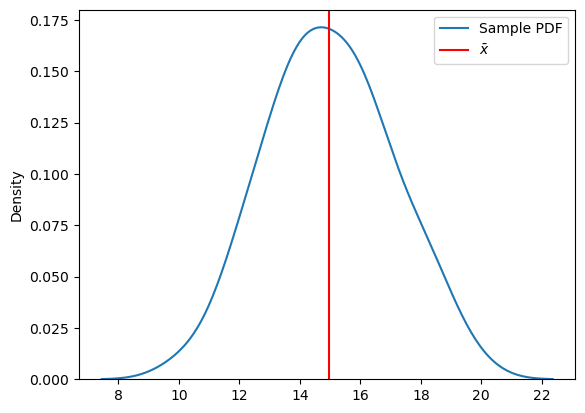

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.kdeplot(sample, ax=ax, label='Sample PDF')
ax.axvline(sample_mean, color="red", label=r'$\bar{x}$')
ax.legend();

### Our Absurd Example

One approach you might take, as described previously, would be to make an extremely wide confidence interval. Let's say we want to be 99.99999999999999% confident in our answer. Then if we calculate a confidence interval using the t-distribution, that would be:

In [8]:
from scipy import stats
stats.t.interval(
    confidence=0.9999999999999999,
    df=len(sample)-1,
    loc=sample_mean,
    scale=stats.sem(sample)
)

(11.408292570256707, inf)

Ok, so we have a confidence interval between about 11.4 and infinity. So, we are 99.99999999999999% confident that the true measurement is between 11.4 inches and infinity inches.

This answer is technically correct — we have strong evidence that this interval contains the true mean — but this is not very useful information for making actual business decisions.

### Tolerating Incorrectness

A more realistic approach is to choose some amount of "incorrectness" that you are willing to tolerate. This is a *conditional probability* based on the true, unknown measurement. It goes something like this:

> Given that the true parameter is outside of my confidence interval, what probability will I tolerate of producing this confidence interval anyway?

In the absurd example above, we used a confidence level of 99.99999999999999%, which means that if the true value were outside of our 11.4 to infinity confidence interval, there would be a probability of 0.00000000000001% or less that we would have gotten those particular sample data points that produced this interval.

Note that even in this absurd example, the probability is not zero. Because we don't know (and typically can't know) the true population parameter, there is some possibility that a sampling event occurred that caused us to obtain an extremely un-representative sample, producing an extremely un-representative point estimate, leading to a confidence interval that does not include the true value, despite the very wide width of the interval.

(Again, this conditional probability only works in one direction, because $P(A|B)$ is not the same thing as $P(B|A)$. We say that *given that the true value is outside of this interval, this is the probability that we would have gotten this interval*, but we can't say anything like *given this interval, this is the probability that the true value is outside of it*. Although some people certainly hold this incorrect belief!)

Most of the time, a probability well above 0.00000000000001% will be tolerated. Let's try again with a confidence level of 99.9%, i.e. tolerating a 0.1% chance that we would get this interval despite the true statistic being outside of the interval.

In [18]:
stats.t.interval(
    confidence=0.00,
    df=len(sample)-1,
    loc=sample_mean,
    scale=stats.sem(sample)
)

(14.9794176958, 14.9794176958)

That is a much more usable range! As it turns out, with our current sample size and variability, "about 14 to 16 inches" ended up being our answer. Compared to just finding the mean of the sample, you are able to express some additional information about your certainty. You could make a product decision based on those numbers, unlike the previous 11.4 to infinity range.

However, keep in mind that we don't actually *know* that the true value is in this range. We only know that if the true value really were outside of this range, there would be a 0.1% chance of producing these values.

## Significance Levels

That value of 0.1% aligns with the concept of a **significance level** used in hypothesis testing. Both confidence intervals and statistical tests are inferential techniques based on sampling, distributions, and choosing some threshold of incorrectness that we are willing to tolerate.

### Typical Confidence Levels

0.1% is actually fairly conservative — we were less willing to tolerate certain kinds of errors than might make sense in other contexts. You'll often see the values of **5% (95% confidence level)** or 10% (90% confidence level). 

There is some debate amongst different domain areas of what probability is appropriate, although 5% is probably the most common — meaning, in the context of confidence intervals, that if the true mean is outside of your calculated confidence interval, there is a 5% chance that you would experience a sampling error that would produce your confidence interval anyway.

This means that you would expect that **1 in 20 times, if you were performing the exact same sampling and calculation task, your confidence interval would not include the true population parameter**. Tolerating this level of incorrectness allows you to make much more useful claims than "11.4 to infinity inches", although you should always be aware of these claims' limitations.

### Typical Significance Levels

The key difference between a confidence interval and a hypothesis test is that a confidence interval is simply estimating a population parameter, whereas hypothesis testing has some hypothesis about that population parameter that we are trying to test.

We'll dive deeper into the formal definition of a hypothesis in future lessons, but the general idea is that you are making some kind of claim about the population parameter, which is called the *alternative hypothesis*. By default, you assume that this claim is not true, i.e. the *null hypothesis*.

In hypothesis testing, the significance level means something like this:

> Given that the null hypothesis is actually true, what probability will I tolerate of rejecting it anyway?

This level is also known as the $\alpha$ (alpha). You can think of it as *what false positive rate will I tolerate*.

Some typical significance levels you might see are **a 5% significance level** or a 1% significance level. Setting a 5% significance level means that you would expect that **1 in 20 times, if you were performing this exact same experiment, you would reject the null hypothesis when it is actually true**. Or for a 1% significance level, 1 in 100 times you would reject the null hypothesis when it is actually true.

A **statistically significant** result means that the probability of obtaining that result, if the null hypothesis were true, is below the specified significance level.

## Statistical Significance and Confidence Intervals

Statistical significance and confidence intervals relate in key ways.

First, as you will see in the upcoming lessons, **we actually use confidence intervals to perform most hypothesis tests**, by computing a test statistic then comparing it to the distribution of that statistic, **in order to determine if a result is statistically significant**!

We also can use the language of statistical significance to describe what a confidence interval represents. Returning to our 99.9% confidence level for chair back heights, we can say *the confidence interval we obtained represents values where the difference between each value and the true parameter is not statistically significant at the 0.1% level*. In other words, 14, 14.25, 14.5, etc. are all values where the difference between those values and the true mean is not statistically significant (at our chosen level). So are 15, 15.33, and 15.9.

(This explanation of a confidence interval is less common, so it's okay if that doesn't completely make sense to you. In future lessons we will discuss many examples of statistically significant/insignificant findings that are more intuitive than this one.)

Once again, a difference being statistically insignificant does not tell you anything decisive about the true value! There is still a possibility that the true mean is 12 and our sample is just particularly unlucky. 

Statistical significance also doesn't tell you anything about the practical significance — if a difference of 1 inch is very important for your business purposes, then this confidence interval may not actually be a useful estimate. We will dig into practical significance more when we discuss *effect sizes*.

## Summary

In this lesson, we took one additional step towards hypothesis testing: understanding how confidence levels relate to significance levels, along with the general concept of statistical significance. In upcoming lessons you will apply this knowledge as you learn to perform statistical tests.